Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 575 entries, 0 to 574
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Movie Title               575 non-null    object        
 1   Date Released             575 non-null    object        
 2   Genre                     575 non-null    object        
 3   Total Gross               575 non-null    int64         
 4   Inflation Adjusted Gross  575 non-null    int64         
 5   Decade                    575 non-null    int64         
 6   Cleaned Release Date      575 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 31.6+ KB
None
        Total Gross  Inflation Adjusted Gross       Decade  \
count  5.750000e+02              5.750000e+02   575.000000   
mean   6.515189e+07              1.195887e+08  1993.652174   
min    2.815000e+03              2.984000e+03  1930.000000 

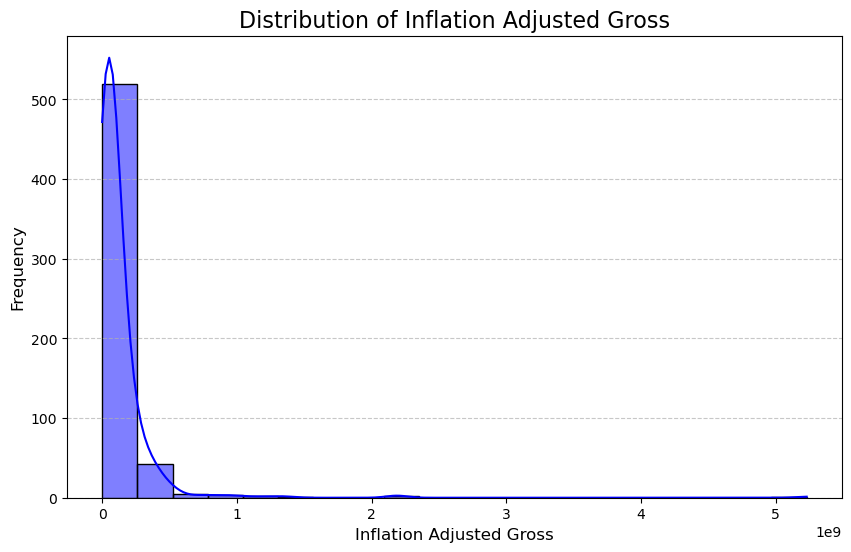


Inflation Adjusted Gross Descriptive Statistics:
Mean: 119588697.38608696
Median: 55417615.0
Standard Deviation: 286907931.5712689
Mode: 2984


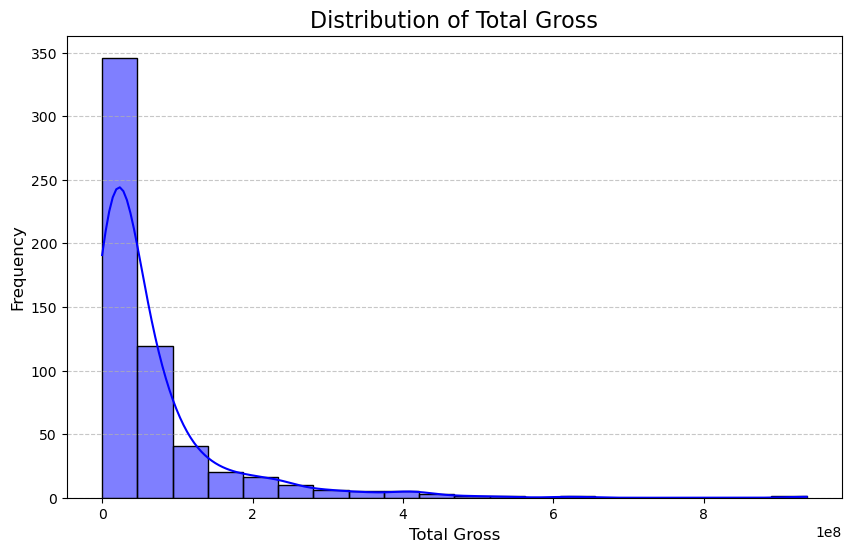


Total Gross Descriptive Statistics:
Mean: 65151887.91826087
Median: 30833914.0
Standard Deviation: 93179032.13268173
Mode: 2815


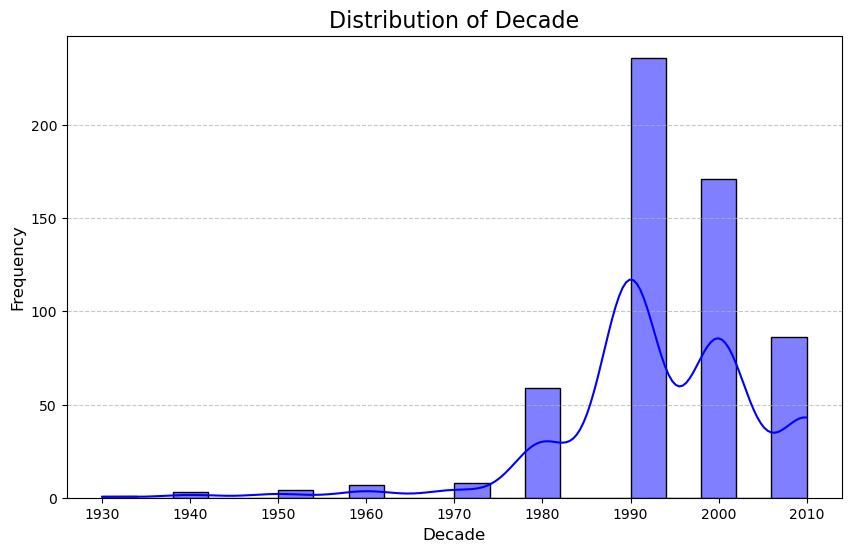


Decade Descriptive Statistics:
Mean: 1993.6521739130435
Median: 1990.0
Standard Deviation: 11.561864713321292
Mode: 1990


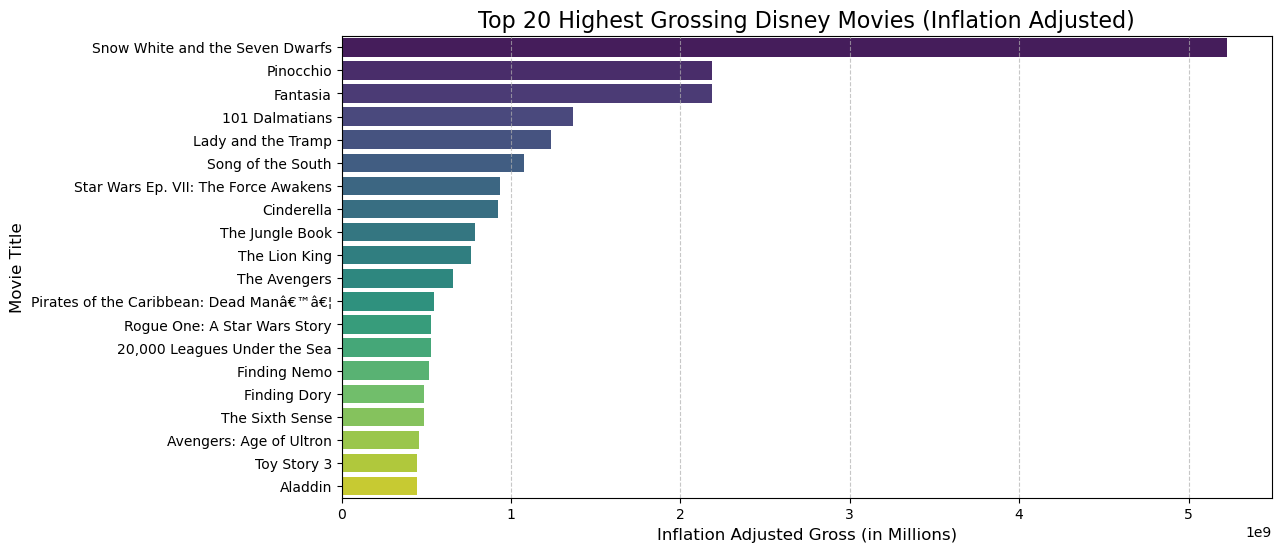

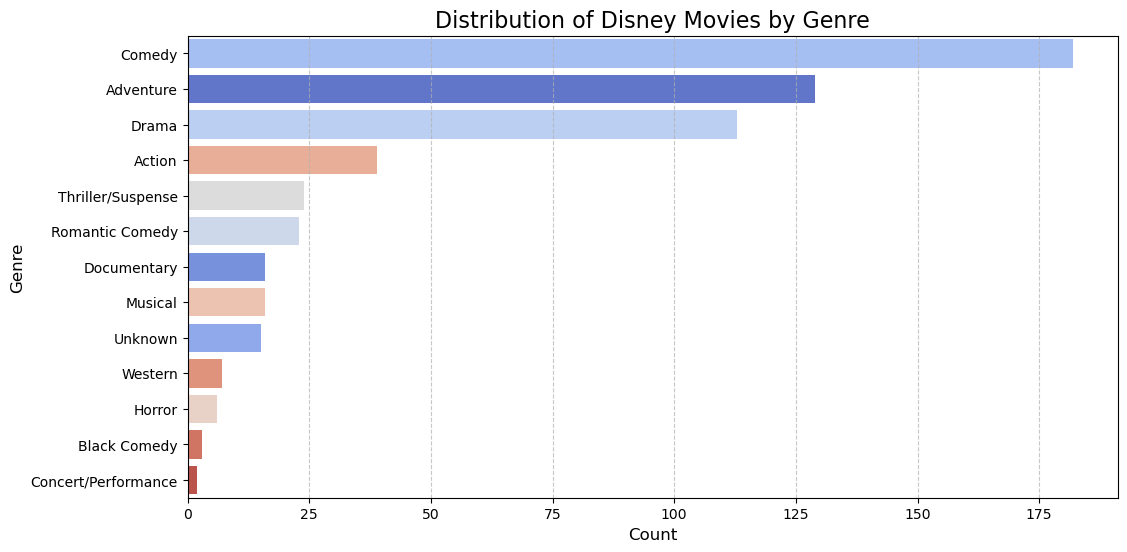

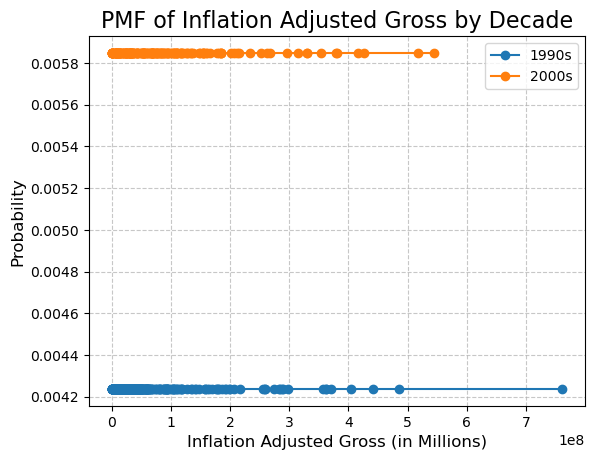

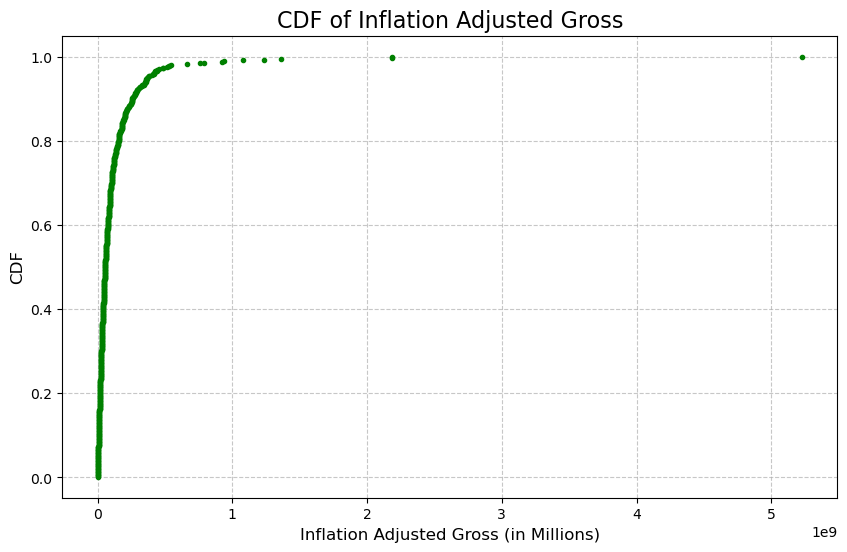

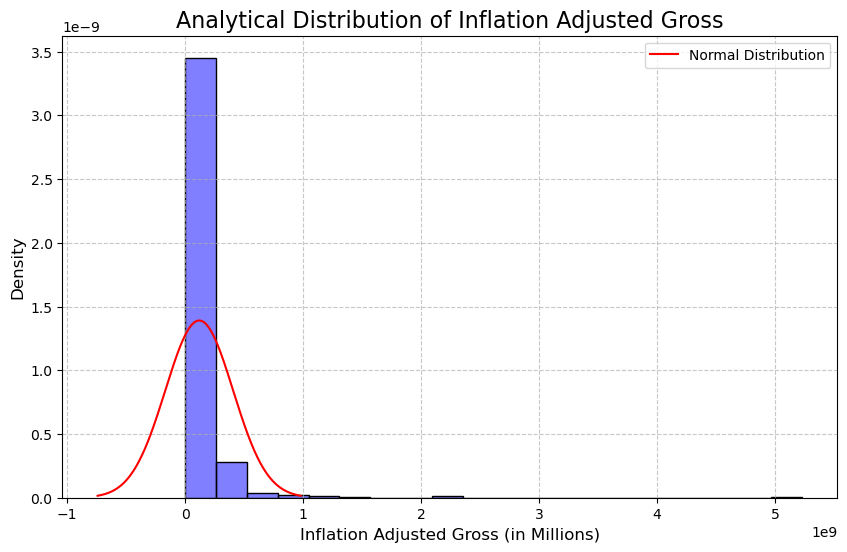

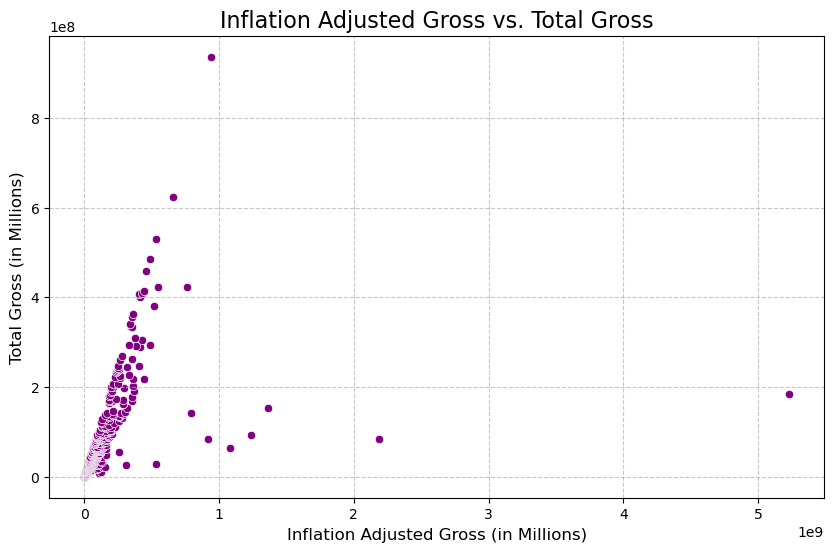

Pearson Correlation: 0.42602630048136503, P-value: 9.332319416723688e-27
T-test: Statistic=-1.7381672436952724, P-value=0.08294137899327264
Regression R-squared: 0.4108406424519516
Mean Squared Error: 1.043650431362273e+16


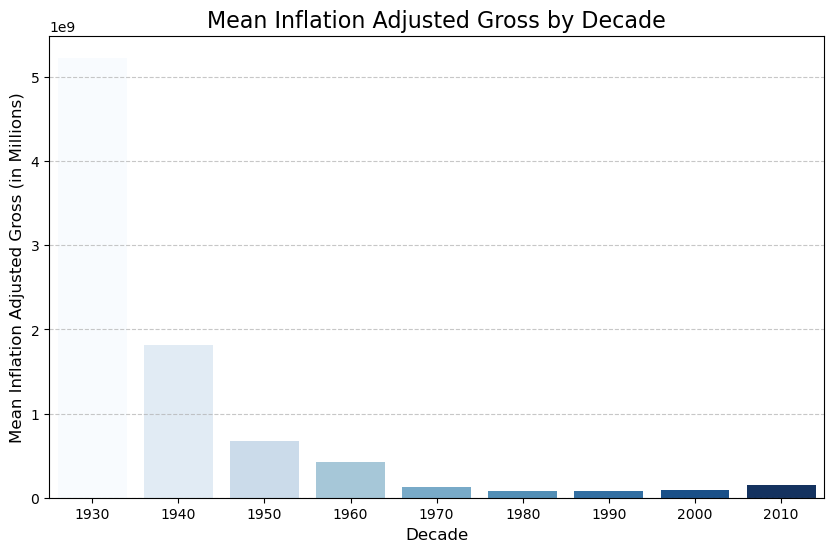

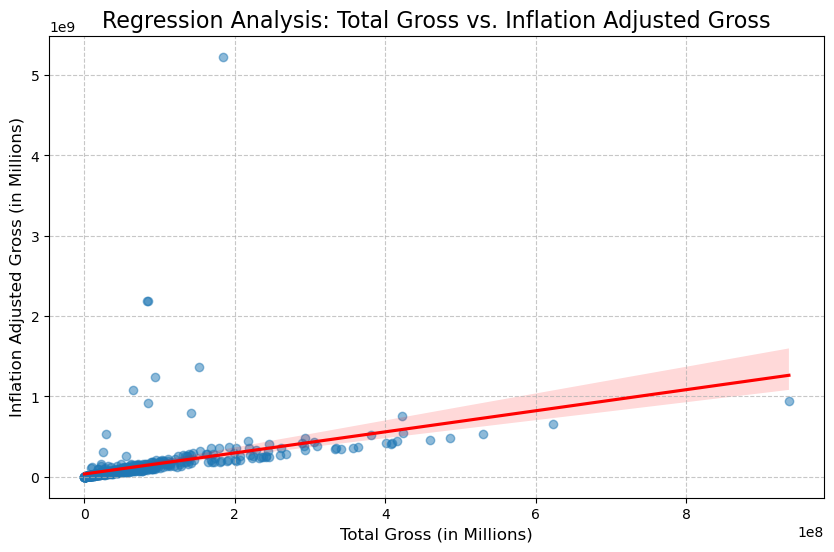

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm, pearsonr, ttest_ind
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data_path = 'Cleaned_Disney_Movie_Data_with_Decades.xlsx'
df = pd.read_excel(data_path)

# --- Data Overview ---
print("Dataset Overview:")
print(df.info())
print(df.describe())

# --- Exploratory Data Analysis ---
# 1. Histograms and Descriptive Statistics for Key Variables
variables = ['Inflation Adjusted Gross', 'Total Gross', 'Decade']
for var in variables:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[var].dropna(), kde=True, bins=20, color='blue')
    plt.title(f'Distribution of {var}', fontsize=16)
    plt.xlabel(var, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    print(f"\n{var} Descriptive Statistics:")
    print(f"Mean: {df[var].mean()}")
    print(f"Median: {df[var].median()}")
    print(f"Standard Deviation: {df[var].std()}")
    print(f"Mode: {df[var].mode()[0]}")

# Additional Histograms for Movie Title and Genre
# Histogram for Top-Grossing Movie Titles (categorical, based on top revenue earners)
top_movies = df.nlargest(20, 'Inflation Adjusted Gross')  # Top 20 movies by revenue
plt.figure(figsize=(12, 6))
sns.barplot(x=top_movies['Inflation Adjusted Gross'], y=top_movies['Movie Title'], hue=top_movies['Movie Title'], palette='viridis', legend=False)
plt.title('Top 20 Highest Grossing Disney Movies (Inflation Adjusted)', fontsize=16)
plt.xlabel('Inflation Adjusted Gross (in Millions)', fontsize=12)
plt.ylabel('Movie Title', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Histogram for Genre Counts
plt.figure(figsize=(12, 6))
sns.countplot(y=df['Genre'], order=df['Genre'].value_counts().index, hue=df['Genre'], palette='coolwarm', legend=False)
plt.title('Distribution of Disney Movies by Genre', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# 2. PMF Comparison: 1990s vs. 2000s
for decade in [1990, 2000]:
    subset = df[df['Decade'] == decade]['Inflation Adjusted Gross'].dropna()
    pmf = subset.value_counts(normalize=True).sort_index()
    plt.plot(pmf.index, pmf.values, marker='o', label=f'{decade}s')

plt.title('PMF of Inflation Adjusted Gross by Decade', fontsize=16)
plt.xlabel('Inflation Adjusted Gross (in Millions)', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.legend()
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

# 3. CDF for Inflation Adjusted Gross
sorted_gross = np.sort(df['Inflation Adjusted Gross'].dropna())
cdf = np.arange(1, len(sorted_gross) + 1) / len(sorted_gross)

plt.figure(figsize=(10, 6))
plt.plot(sorted_gross, cdf, marker='.', linestyle='none', color='green')
plt.title('CDF of Inflation Adjusted Gross', fontsize=16)
plt.xlabel('Inflation Adjusted Gross (in Millions)', fontsize=12)
plt.ylabel('CDF', fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

# 4. Analytical Distribution
mean_gross = df['Inflation Adjusted Gross'].mean()
std_gross = df['Inflation Adjusted Gross'].std()

x = np.linspace(mean_gross - 3*std_gross, mean_gross + 3*std_gross, 1000)
pdf = norm.pdf(x, mean_gross, std_gross)

plt.figure(figsize=(10, 6))
plt.plot(x, pdf, label='Normal Distribution', color='red')
sns.histplot(df['Inflation Adjusted Gross'], kde=False, bins=20, stat='density', color='blue', alpha=0.5)
plt.title('Analytical Distribution of Inflation Adjusted Gross', fontsize=16)
plt.xlabel('Inflation Adjusted Gross (in Millions)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

# 5. Scatter Plots and Correlation Analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Inflation Adjusted Gross', y='Total Gross', data=df, color='purple')
plt.title('Inflation Adjusted Gross vs. Total Gross', fontsize=16)
plt.xlabel('Inflation Adjusted Gross (in Millions)', fontsize=12)
plt.ylabel('Total Gross (in Millions)', fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

# Pearson Correlation
correlation, p_value = pearsonr(df['Inflation Adjusted Gross'].dropna(), df['Total Gross'].dropna())
print(f"Pearson Correlation: {correlation}, P-value: {p_value}")

# 6. Hypothesis Testing
# Example: Compare Inflation Adjusted Gross between 1990s and 2000s
data_1990s = df[df['Decade'] == 1990]['Inflation Adjusted Gross'].dropna()
data_2000s = df[df['Decade'] == 2000]['Inflation Adjusted Gross'].dropna()

stat, p_value = ttest_ind(data_1990s, data_2000s)
print(f"T-test: Statistic={stat}, P-value={p_value}")

# 7. Regression Analysis
# Dependent Variable: Inflation Adjusted Gross
# Explanatory Variables: Total Gross, Decade
df['Decade_Coded'] = df['Decade'].astype('category').cat.codes
X = df[['Total Gross', 'Decade_Coded']].dropna()
y = df['Inflation Adjusted Gross'].dropna()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions and Metrics
predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)

print(f"Regression R-squared: {r2}")
print(f"Mean Squared Error: {mse}")

# Bar Chart for Hypothesis Testing (T-test)
avg_revenue_per_decade = df.groupby('Decade')['Inflation Adjusted Gross'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_revenue_per_decade.index, y=avg_revenue_per_decade.values, hue=avg_revenue_per_decade.index, palette='Blues', legend=False)
plt.title('Mean Inflation Adjusted Gross by Decade', fontsize=16)
plt.xlabel('Decade', fontsize=12)
plt.ylabel('Mean Inflation Adjusted Gross (in Millions)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Scatter Plot for Regression Analysis
plt.figure(figsize=(10, 6))
sns.regplot(x='Total Gross', y='Inflation Adjusted Gross', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Regression Analysis: Total Gross vs. Inflation Adjusted Gross', fontsize=16)
plt.xlabel('Total Gross (in Millions)', fontsize=12)
plt.ylabel('Inflation Adjusted Gross (in Millions)', fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()